In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


In [3]:
df= pd.read_csv('creditcard.csv') # for k mean as it dont need much Computaion

In [ ]:
df2 = pd.read_csv('creditcard2.csv') # my kernal was falling Again and again Due to its size i have reduce the data 

In [5]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
input = df.drop('Class', axis=1)
target = df.Class

In [19]:
input2 = df2.drop('Class', axis=1)
target2 = df2.Class

In [9]:
scaler = MinMaxScaler()
scaled_array = scaler.fit_transform(input)
scaled_input = pd.DataFrame(scaled_array, columns=input.columns, index=input.index)

In [10]:
scaler2 = MinMaxScaler()
scaled_array2 = scaler.fit_transform(input2)
scaled_input2 = pd.DataFrame(scaled_array2, columns=input2.columns, index=input2.index)

In [11]:
scaled_input2.shape[0]

48

In [20]:
target2.shape[0]

48

In [13]:
scaled_input.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.000000,0.935192,0.766490,0.881365,0.313023,0.763439,0.267669,0.266815,0.786444,0.475312,...,0.582942,0.561184,0.522992,0.663793,0.391253,0.585122,0.394557,0.418976,0.312697,0.005824
1,0.000000,0.978542,0.770067,0.840298,0.271796,0.766120,0.262192,0.264875,0.786298,0.453981,...,0.579530,0.557840,0.480237,0.666938,0.336440,0.587290,0.446013,0.416345,0.313423,0.000105
2,0.000006,0.935217,0.753118,0.868141,0.268766,0.762329,0.281122,0.270177,0.788042,0.410603,...,0.585855,0.565477,0.546030,0.678939,0.289354,0.559515,0.402727,0.415489,0.311911,0.014739
3,0.000006,0.941878,0.765304,0.868484,0.213661,0.765647,0.275559,0.266803,0.789434,0.414999,...,0.578050,0.559734,0.510277,0.662607,0.223826,0.614245,0.389197,0.417669,0.314371,0.004807
4,0.000012,0.938617,0.776520,0.864251,0.269796,0.762975,0.263984,0.268968,0.782484,0.490950,...,0.584615,0.561327,0.547271,0.663392,0.401270,0.566343,0.507497,0.420561,0.317490,0.002724


In [15]:
X_train, X_test, y_train, y_test = train_test_split(scaled_input, target, test_size=0.2, random_state=42)

In [21]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(scaled_input2, target2, test_size=0.2, random_state=42)

In [22]:
print("Rows in X_train:", X_train.shape[0])
print("Rows in X_test:", X_test.shape[0])

Rows in X_train: 227845
Rows in X_test: 56962


In [47]:
# KMeans model
K_model = KMeans(n_clusters=3, random_state=42)
K_model.fit(scaled_input)

KMeans(n_clusters=3, random_state=42)

In [48]:
# Predict clusters with KMeans for X_test
K_prediction_test = K_model.predict(X_test)  # Make predictions on the test data
distances_test = np.min(K_model.transform(X_test), axis=1)  # Calculate the distances for test data
threshold_test = np.percentile(distances_test, 95)  # Set the threshold for anomalies
K_anomalies_test = (distances_test > threshold_test).astype(int)

In [49]:
'''distances = np.min(K_model.transform(scaled_input), axis=1)
threshold = np.percentile(distances, 95)
K_anomalies = (distances > threshold).astype(int)'''

'distances = np.min(K_model.transform(scaled_input), axis=1)\nthreshold = np.percentile(distances, 95)\nK_anomalies = (distances > threshold).astype(int)'

In [50]:
df.K_Cluster.head()

0    2
1    2
2    1
3    1
4    1
Name: K_Cluster, dtype: int32

In [53]:
# DBSCAN model
DB_model = DBSCAN(eps=0.5, min_samples=5)
DB_model.fit(scaled_input2)

DBSCAN()

In [54]:
DB_anomalies = (DB_model.labels_ == -1).astype(int)

In [55]:
DB_anomalies_test = DB_anomalies[X_test2.index]

In [37]:
df2['DB_Cluster'] = DB_model.labels_
df2['DB_Anomaly'] = DB_anomalies

In [38]:
df2['DB_Cluster'].head()

0   -1
1   -1
2   -1
3   -1
4   -1
Name: DB_Cluster, dtype: int64

In [39]:
# Visualizing the results with PCA (2D projection)
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_input)

plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

In [60]:
K_model = KMeans(n_clusters=3, random_state=42)
K_model.fit(scaled_input)

K_labels = K_model.labels_

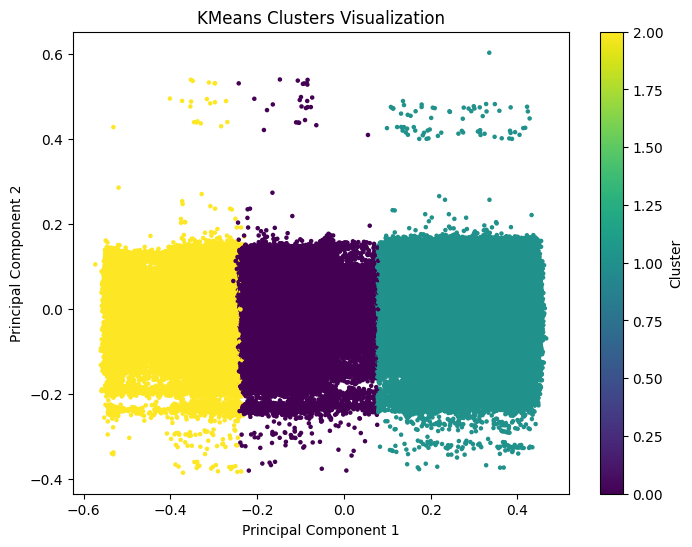

In [61]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_input)  # Apply PCA to the scaled input data

plt.figure(figsize=(8, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=K_labels, cmap='viridis', s=5)
plt.title("KMeans Clusters Visualization")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label='Cluster')
plt.show()

In [62]:
inertia = []

for k in range(1, 11):
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(scaled_input)  # Fit on the scaled input data
    inertia.append(model.inertia_) 

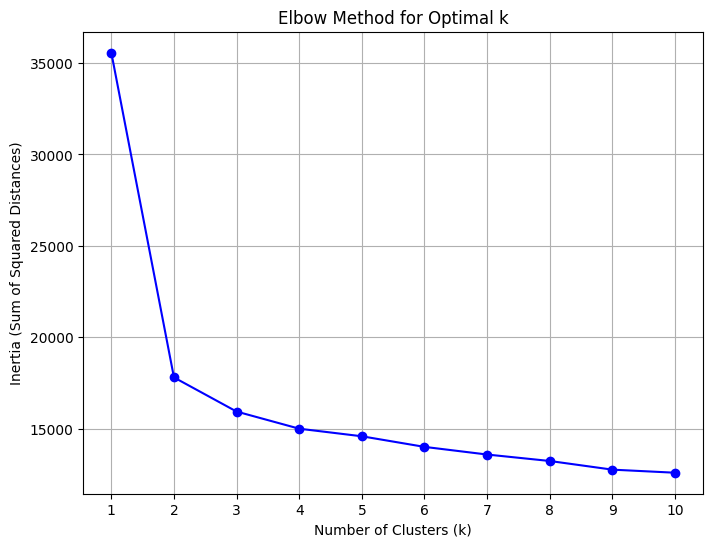

In [63]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='-', color='b')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (Sum of Squared Distances)")
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

Text(0.5, 1.0, 'KMeans Anomaly Detection (red = anomaly)')

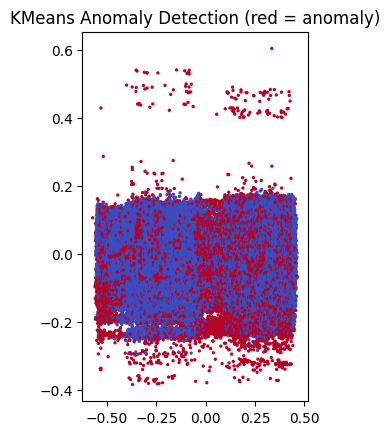

In [ ]:
# KMeans visualization (Red indicates anomalies)
plt.subplot(1, 2, 1)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=K_anomalies_test, cmap='coolwarm', s=2)
plt.title("KMeans Anomaly Detection (red = anomaly)")

Text(0.5, 1.0, 'DBSCAN Anomaly Detection (red = anomaly)')

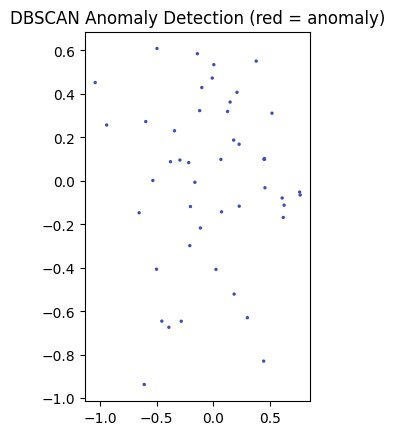

In [40]:
# DBSCAN visualization (Red indicates anomalies)
reduced_data2 = pca.fit_transform(scaled_input2)
plt.subplot(1, 2, 2)
plt.scatter(reduced_data2[:, 0], reduced_data2[:, 1], c=DB_anomalies, cmap='coolwarm', s=2)
plt.title("DBSCAN Anomaly Detection (red = anomaly)")

In [41]:
plt.show()

In [ ]:
print("=== KMeans Evaluation ===")
print(confusion_matrix(y_test, K_anomalies_test)) 
print(classification_report(y_test, K_anomalies_test))

=== KMeans Evaluation ===
[[54094  2770]
 [   19    79]]
              precision    recall  f1-score   support

           0       1.00      0.95      0.97     56864
           1       0.03      0.81      0.05        98

    accuracy                           0.95     56962
   macro avg       0.51      0.88      0.51     56962
weighted avg       1.00      0.95      0.97     56962



In [ ]:
# Evaluate DBSCAN using the anomalies for the test set

# the model perform so bad because of the non proper and srinked data set
print("=== DBSCAN Evaluation ===")
print(confusion_matrix(y_test2, DB_anomalies_test))
print(classification_report(y_test2, DB_anomalies_test))

=== DBSCAN Evaluation ===
[[ 0 10]
 [ 0  0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      10.0
           1       0.00      0.00      0.00       0.0

    accuracy                           0.00      10.0
   macro avg       0.00      0.00      0.00      10.0
weighted avg       0.00      0.00      0.00      10.0



C:\Users\ZAIN PC\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ZAIN PC\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ZAIN PC\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is"